# **Import Libraries**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# **Import CIFAR-10 Dataset**

In [ ]:
df = tf.keras.datasets.cifar10

# **Load Dataset**

In [ ]:
(x_train , y_train) , (x_test , y_test) = df.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#**Data Preprocessing**

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
print("The Shape of X_train = " , x_train.shape)

print("The Shape of X_test = " , x_test.shape)

The Shape of X_train =  (50000, 32, 32, 3)
The Shape of X_test =  (10000, 32, 32, 3)


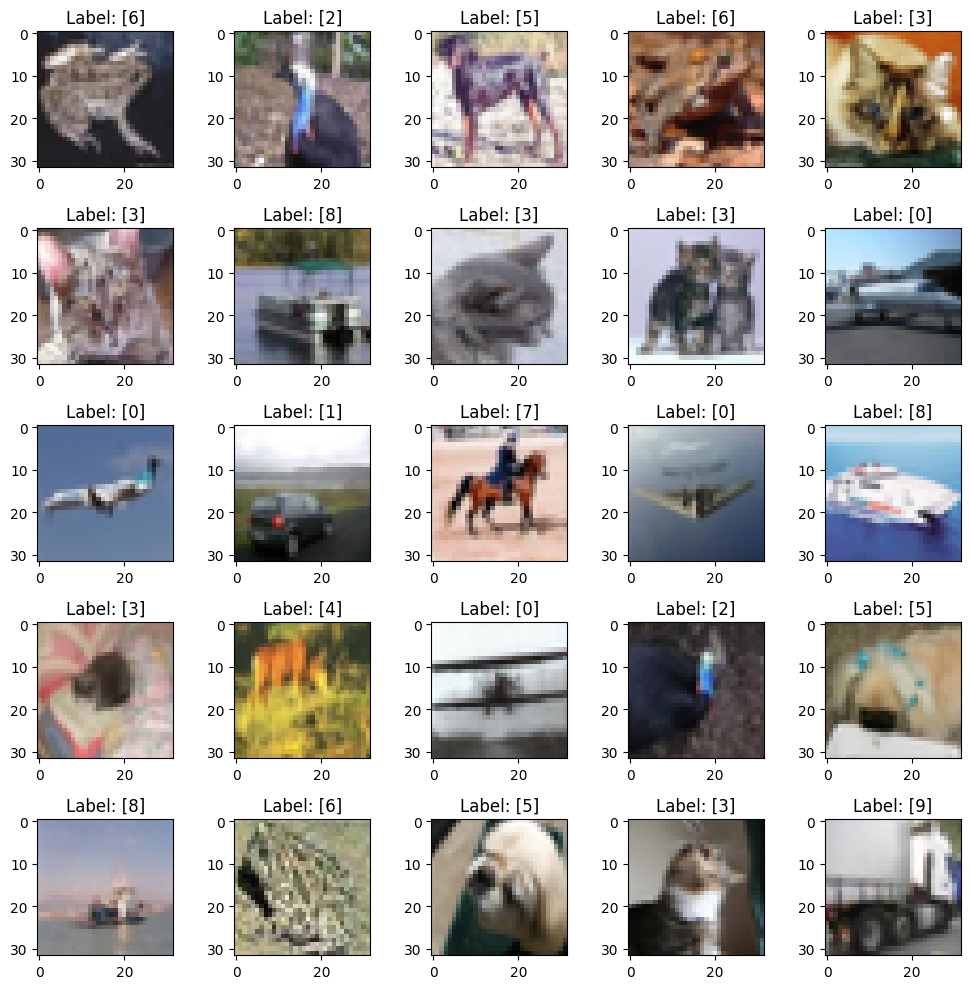

In [ ]:
#Plot Figure
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(x_train[i])
        ax.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

# **LeNet-5 Architecture**

In [ ]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10)
])

# **Print LeNet-5 architecture**

In [ ]:
print("The LeNet Architecture is: ")
model.summary()

The LeNet Architecture is: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)              

# **The Model Training**

In [ ]:
# Compile the model using Adam Optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
(x_train , x_vald , y_train , y_vald) = train_test_split(x_train , y_train , test_size = 0.2 , random_state = 42)
# Train the model
model.fit(x_train, y_train, validation_data=(x_vald, y_vald), epochs=10, batch_size=128)


Epoch 1/10
313/313 [==============================] - 39s 114ms/step - loss: 3.7831 - accuracy: 0.1410 - val_loss: 3.3678 - val_accuracy: 0.1789
Epoch 2/10
313/313 [==============================] - 28s 89ms/step - loss: 3.3458 - accuracy: 0.1799 - val_loss: 3.2517 - val_accuracy: 0.2076
Epoch 3/10
313/313 [==============================] - 28s 90ms/step - loss: 3.3863 - accuracy: 0.1870 - val_loss: 3.2382 - val_accuracy: 0.2656
Epoch 4/10
313/313 [==============================] - 28s 89ms/step - loss: 3.3981 - accuracy: 0.2109 - val_loss: 3.4792 - val_accuracy: 0.1575
Epoch 5/10
313/313 [==============================] - 27s 87ms/step - loss: 3.3846 - accuracy: 0.1938 - val_loss: 3.2902 - val_accuracy: 0.2029
Epoch 6/10
313/313 [==============================] - 28s 89ms/step - loss: 3.5430 - accuracy: 0.1263 - val_loss: 3.4052 - val_accuracy: 0.1399
Epoch 7/10
313/313 [==============================] - 28s 88ms/step - loss: 3.3491 - accuracy: 0.1769 - val_loss: 3.3264 - val_accuracy

# **Number of Trainable parameters in each layer**

In [ ]:
for layer in model.layers:
  print("The number of trainable Parameters = " , layer.name , layer.count_params())

The number of trainable Parameters =  conv2d 456
The number of trainable Parameters =  max_pooling2d 0
The number of trainable Parameters =  conv2d_1 2416
The number of trainable Parameters =  max_pooling2d_1 0
The number of trainable Parameters =  flatten 0
The number of trainable Parameters =  dense 48120
The number of trainable Parameters =  dense_1 10164
The number of trainable Parameters =  dense_2 850


# **Confusion matrix relative to testing samples**

In [ ]:
# Testing
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
[[  0 535   0   0   0   0   0 465   0   0]
 [  0 273   0   0   0   0   0 727   0   0]
 [  0 456   0   0   0   0   0 544   0   0]
 [  0 591   0   0   0   0   0 409   0   0]
 [  0 451   0   0   0   0   0 549   0   0]
 [  0 563   0   0   0   0   0 437   0   0]
 [  0 442   0   0   0   0   0 558   0   0]
 [  0 398   0   0   0   0   0 602   0   0]
 [  0 308   0   0   0   0   0 692   0   0]
 [  0 212   0   0   0   0   0 788   0   0]]


# **Precision, Recall, and f1_score**

In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.016886894498093653
Recall: 0.0875
F1 Score: 0.028223483210644974


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
